# model building

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
df = pd.read_csv('Algerian_forest_fires_clean_dataset.csv')

In [32]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [34]:
#drop date
df.drop(['Unnamed: 0','day','month','year'],axis =1, inplace=True)

In [36]:
# see the classes
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [37]:
# Encodding the classes
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [38]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [39]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [40]:
#independent and dependent features
X = df.drop('FWI', axis=1)
y = df['FWI']

In [43]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [44]:
# train test split of dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

# Feature Selection based on correlation

In [46]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

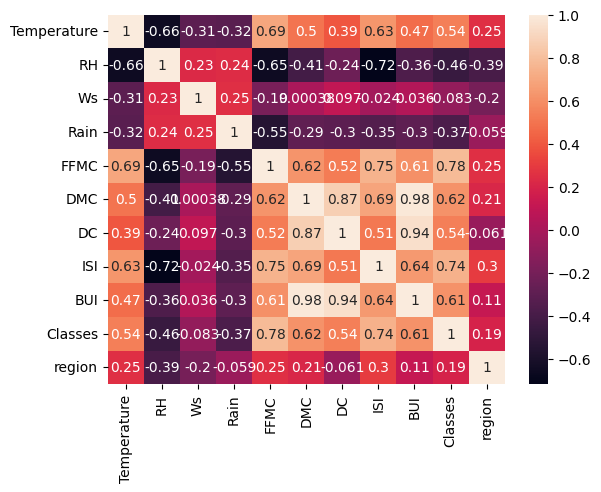

In [48]:
# to check the multicollinearity
plt.Figure(figsize= (12,12))
cor = X_train.corr()
sns.heatmap(cor,annot=True)

In [52]:
# now remove the multicollinearity
def correlation(dataset,threshold):
    correlation_columns = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                column_name = corr_matrix.columns[i]
                correlation_columns.add(column_name)
    
    return correlation_columns

In [53]:
# set threshold :- normally threshold set by Domain Expertise
feature = correlation(X_train, 0.80)

In [54]:
feature

{'BUI', 'DC'}

In [63]:
# remove feature when correlation is more thain 0.80
X_train.drop(feature,axis= 1, inplace=True)
X_test.drop(feature,axis= 1, inplace=True)
X_train.shape,y_test.shape

((182, 9), (61,))

# Feature scaling and Standarization

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)
X_train_scale

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

Text(0.5, 1.0, 'X_train After Scaling')

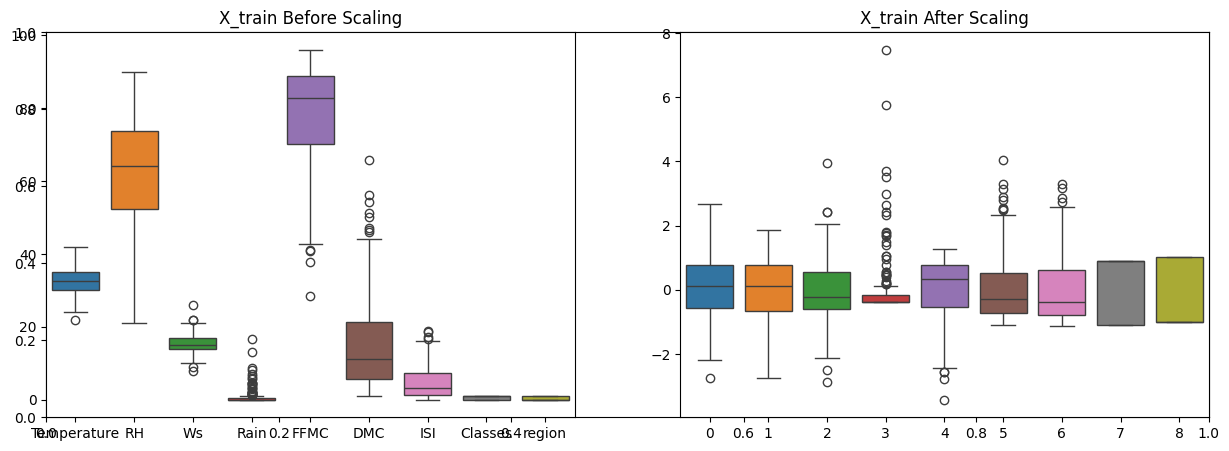

In [66]:
# lets visualize before and after scaler
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scale)
plt.title('X_train After Scaling')

# Linear Regression model

MAE :  0.5468236465249978
R2 score :  0.9847657384266951


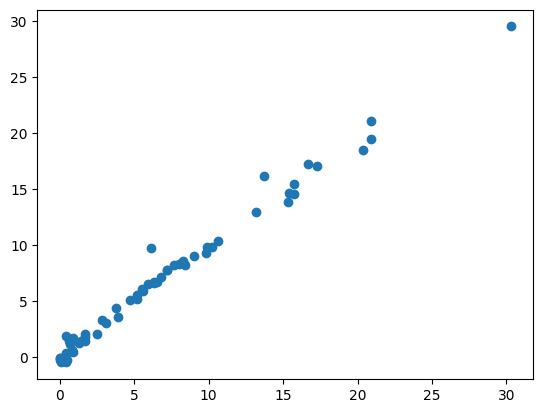

In [70]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_scale,y_train)
y_pred = reg.predict(X_test_scale)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)
print('MAE : ',mae)
print("R2 score : ",score)
plt.scatter(y_test,y_pred)


# Ridge Regresion Model

In [71]:
from sklearn.linear_model import Ridge

MAE :  0.5642305340105715
R2 score :  0.9842993364555512


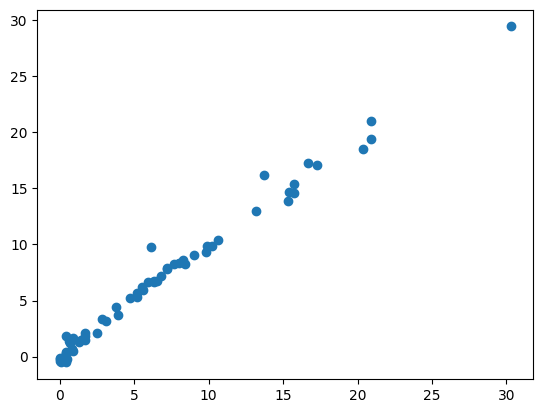

In [72]:
ridge = Ridge()
ridge.fit(X_train_scale,y_train)
y_pred = ridge.predict(X_test_scale)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)
print('MAE : ',mae)
print("R2 score : ",score)
plt.scatter(y_test,y_pred)

# Lasso Regression model

MAE :  1.133175994914409
R2 score :  0.9492020263112388


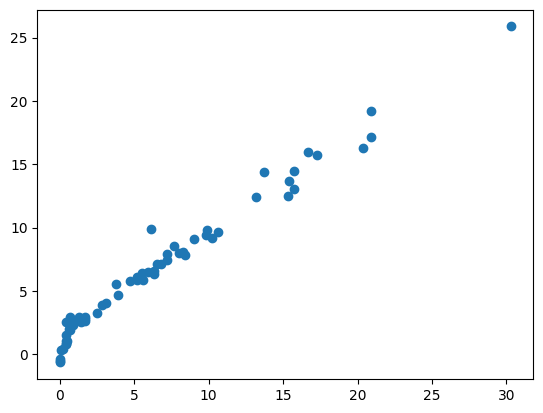

In [76]:

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scale,y_train)
y_pred = lasso.predict(X_test_scale)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)
print('MAE : ',mae)
print("R2 score : ",score)
plt.scatter(y_test,y_pred)

# ElasticNet Regression model

MAE :  1.8822353634896005
R2 score :  0.8753460589519703


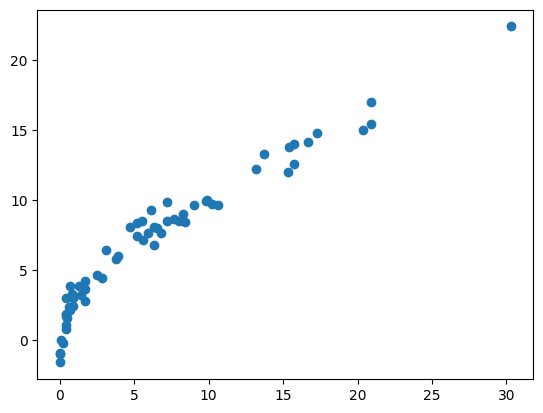

In [77]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train_scale,y_train)
y_pred = elasticnet.predict(X_test_scale)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)
print('MAE : ',mae)
print("R2 score : ",score)
plt.scatter(y_test,y_pred)

# Hyperparameter tunning (CV)

In [91]:
from sklearn.linear_model import LassoCV
# Initialize LassoCV with 5-fold cross-validation
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scale, y_train)
y_pred = lassocv.predict(X_test_scale)
optimal_alpha = lassocv.alpha_
print("Optimal alpha:", optimal_alpha)

Optimal alpha: 0.05725391318234408


In [82]:
# to see all the alpha value
lassocv.alphas_

array([19.51523263, 18.19997126, 16.97335411, 15.82940685, 14.76255781,
       13.76761082, 12.83971993, 11.97436578, 11.1673336 , 10.41469269,
        9.71277726,  9.05816858,  8.44767834,  7.87833309,  7.34735981,
        6.85217235,  6.39035887,  5.95967007,  5.55800825,  5.1834171 ,
        4.83407213,  4.50827185,  4.20442942,  3.92106494,  3.65679829,
        3.41034232,  3.18049667,  2.96614184,  2.7662338 ,  2.5797989 ,
        2.40592909,  2.24377752,  2.09255443,  1.95152326,  1.81999713,
        1.69733541,  1.58294069,  1.47625578,  1.37676108,  1.28397199,
        1.19743658,  1.11673336,  1.04146927,  0.97127773,  0.90581686,
        0.84476783,  0.78783331,  0.73473598,  0.68521723,  0.63903589,
        0.59596701,  0.55580082,  0.51834171,  0.48340721,  0.45082718,
        0.42044294,  0.39210649,  0.36567983,  0.34103423,  0.31804967,
        0.29661418,  0.27662338,  0.25797989,  0.24059291,  0.22437775,
        0.20925544,  0.19515233,  0.18199971,  0.16973354,  0.15

In [84]:
lassocv.mse_path_

array([[6.71122892e+01, 5.50101812e+01, 7.28091178e+01, 8.46074674e+01,
        7.12522325e+01],
       [6.17167617e+01, 5.12391651e+01, 7.07140110e+01, 7.98699676e+01,
        6.55803457e+01],
       [5.70244609e+01, 4.70392068e+01, 6.32667311e+01, 7.46652567e+01,
        5.98423001e+01],
       [5.15614281e+01, 4.33450791e+01, 5.67294288e+01, 6.89266487e+01,
        5.49146213e+01],
       [4.62177523e+01, 4.00914165e+01, 5.07273447e+01, 6.35853224e+01,
        5.05804497e+01],
       [4.14844998e+01, 3.72213329e+01, 4.54530374e+01, 5.88906000e+01,
        4.67555023e+01],
       [3.73028673e+01, 3.42508649e+01, 4.08117838e+01, 5.47584510e+01,
        4.25272676e+01],
       [3.36022011e+01, 3.08358993e+01, 3.67214143e+01, 5.11156833e+01,
        3.83851693e+01],
       [3.03214611e+01, 2.78097867e+01, 3.31106321e+01, 4.73364115e+01,
        3.46971099e+01],
       [2.74071363e+01, 2.51230705e+01, 2.99173461e+01, 4.28008373e+01,
        3.14706110e+01],
       [2.48135382e+01, 2.2733

MAE :  0.619970115826343
R2 score :  0.9820946715928275


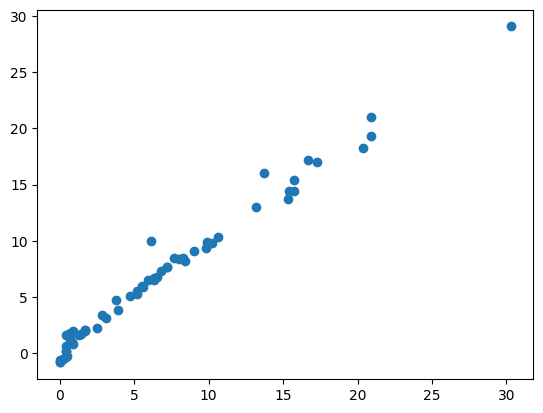

In [94]:
# plot
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)
print('MAE : ',mae)
print("R2 score : ",score)
plt.scatter(y_test,y_pred)

In [103]:
# cross validation Ridge
from sklearn.linear_model import RidgeCV
# Initialize LassoCV with 5-fold cross-validation
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scale, y_train)
y_pred = ridgecv.predict(X_test_scale)
optimal_alpha = ridgecv.alpha_
print("Optimal alpha:", optimal_alpha)

Optimal alpha: 1.0


In [99]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [100]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

In [115]:
# cross validation ElasticNet
from sklearn.linear_model import ElasticNetCV
# Initialize LassoCV with 5-fold cross-validation
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train_scale, y_train)
y_pred = elasticnetcv.predict(X_test_scale)
optimal_alpha = elasticnetcv.alpha_
print("Optimal alpha:", optimal_alpha)

Optimal alpha: 0.04311146156383891


In [117]:
elasticnetcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11